In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cmap = plt.cm.inferno
import math
import pyvista as pv

In [100]:
def fence_diagram(array3d,xsections,ysections,zscalefactor):
    import pyvista as pv   
    pv.set_plot_theme("document")
    
    lighting = True; off_screen = True; notebook = False
    
    plotter = pv.Plotter(off_screen=off_screen,notebook=notebook,window_size=[5000, 5000])
    
    light = pv.Light(position=(-50, 0, 150), show_actor=False, positional=True,
                     cone_angle=180, exponent=20, intensity=1.)
    plotter.add_light(light)
    
    mesh = pv.wrap(array3d)
    
    for xsection in xsections:
        slices = mesh.slice(normal=[1, 0, 0],origin=(xsection,0,0)) 
        plotter.add_mesh(mesh=slices,style='surface',cmap=plt.cm.inferno,show_scalar_bar=False,lighting=lighting,diffuse=1.0,opacity=opacity,
                    show_edges=False,clim=[0,2000])
    
    for ysection in ysections:
        slices = mesh.slice(normal=[0, 1, 0],origin=(0,ysection,0)) 
        plotter.add_mesh(mesh=slices,style='surface',cmap=plt.cm.inferno,show_scalar_bar=False,lighting=lighting,diffuse=1.0,opacity=opacity,
                    show_edges=False,clim=[0,2000])
    
    plotter.camera_position = [-1.0,-1.0,1.0]
    
    plotter.set_scale(zscale=zscalefactor)
    plotter.show(screenshot='airplane.png')
    
    plt.imshow(plotter.image); plt.show()

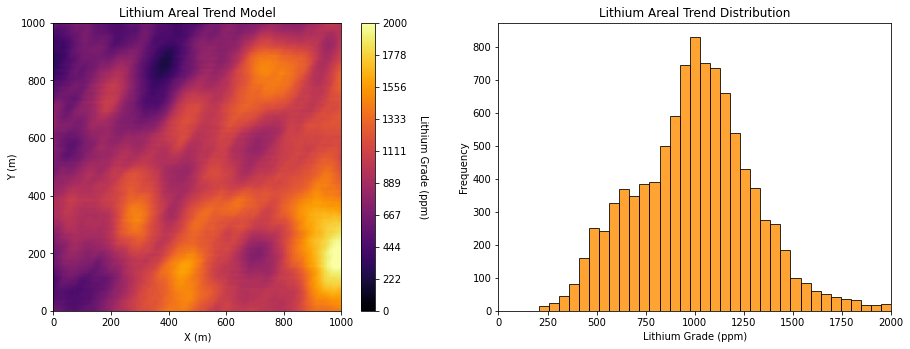

In [102]:
lithium_areal_trend = np.loadtxt(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Lithium_Trend_Map.csv', delimiter=",")

global_mean = 1000.0
xmin=0; ymin=0; xmax=1000; ymax=1000;
vmin=0;vmax=2000

nx = 100; ny = 100; nz = 30
xsiz=10.0; ysiz=10.0; zsiz=1.0
xmn=xsiz/2; ymn=ysiz/2; zmn=zsiz/2

plt.subplot(121)
im = plt.imshow(lithium_areal_trend,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,cmap = cmap)
plt.title('Lithium Areal Trend Model')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))
cbar.set_label('Lithium Grade (ppm)', rotation=270, labelpad=20)

plt.subplot(122)
plt.hist(lithium_areal_trend.flatten(),bins=np.linspace(0,2000,40),color='darkorange',alpha=0.8,edgecolor='black')
plt.xlabel('Lithium Grade (ppm)'); plt.ylabel('Frequency'); plt.title('Lithium Areal Trend Distribution')
plt.xlim([0,2000])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

In [68]:
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

Text(0.5, 1.0, 'Lithium Vertical Trend Model')

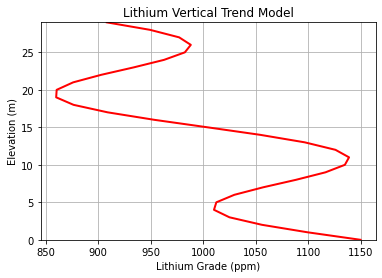

In [103]:
vgradient = 10.0; amp = 100.0; lambd = 10

z = np.arange(0,30,1)
lithium_vertical_trend = (z-15)*-1*vgradient + amp*np.sin(3.1*lambd*z) + global_mean

plt.plot(lithium_vertical_trend,z,color='red',lw=2)
plt.ylim([0,29]); plt.grid()
plt.xlabel('Lithium Grade (ppm)'); plt.ylabel('Elevation (m)'); plt.title('Lithium Vertical Trend Model')

In [98]:
lithium_3D_trend = np.zeros([ny,nx,nz])

for iy in range(0,ny):
    for ix in range(0,nx):
        for iz in range(0,nz):
            lithium_3D_trend[iy,ix,iz] = lithium_vertical_trend[iz]*lithium_areal_trend[iy,ix]/global_mean
            
    

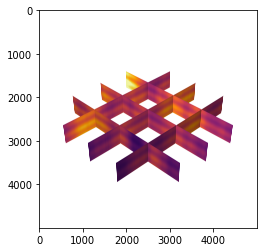

<Figure size 432x288 with 0 Axes>

In [101]:
xsections = [25,50,75]; ysections = [25,50,75]
zscalefactor = 0.5; opacity = 1.0    

# plt.subplot(131)
# im = plt.imshow(lithium_areal_trend,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,cmap = cmap)
# plt.title('Lithium Areal Trend Model')
# plt.xlabel('X (m)')
# plt.ylabel('Y (m)')
# cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))
# cbar.set_label('Feature', rotation=270, labelpad=20)

# plt.subplot(132)
# plt.plot(lithium_vertical_trend,z,color='red',lw=2)
# plt.ylim([0,29]); plt.grid()
# plt.xlabel('Lithium Grade (ppm)'); plt.ylabel('Depth (m)'); plt.title('Lithium Vertical Trend Model')

plt.subplot(111)
fence_diagram(lithium_3D_trend,xsections,ysections,zscalefactor)

plt.subplots_adjust(left=0.0, bottom=0.0, right=6.0, top=2.0, wspace=0.6, hspace=0.2); plt.show()

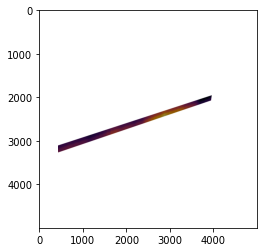

In [80]:
mesh = pv.wrap(lithium_3D_trend)

plotter = pv.Plotter(off_screen=True,notebook=False,window_size=[5000, 5000])

slices = mesh.slice(normal=[0, 1, 0],origin=(0,10,0)) 
plotter.add_mesh(mesh=slices,style='surface',cmap=plt.cm.inferno,show_scalar_bar=False,diffuse=1.0,opacity=opacity,
                    show_edges=False)
    
plotter.camera_position = [-1.0,-1.0,0.5]
    
plotter.set_scale(zscale=zscalefactor)
plotter.show(screenshot='airplane.png')
    
plt.imshow(plotter.image); plt.show()